# 09 - Random Variables


## Introduction to Random Variables
A **random variable** is a numerical outcome of a random event. It can be either **discrete** or **continuous**.

### Types of Random Variables
1. **Discrete Random Variable**: Takes a countable, finite number of distinct values.

    - **Example**: The number of heads when flipping a coin $10$ times can be $0, 1, 2, ..., 10$.

2. **Continuous Random Variable**: Can take any value in a continuous range.

    - **Example**: The height of a person is a continuous variable since it can be any value within a reasonable range.

Each random variable has an associated **distribution function**, which describes the probability that the random variable will take a specific value (discrete) or fall within an interval (continuous).

<p align="center">
  <img src="imgs/random_variables1.jpg" alt="Alt text" width="900" height="500">
</p>

## Probability Mass Function (PMF) (for Discrete Random Variables)
- **Definition**: The PMF provides the probability that a discrete random variable takes a particular value.

- **Formula**:

$$P(X = x) = \text{Probability that } X \text{ takes the value } x$$

### Example: Rolling a Die
Consider a fair six-sided die. A die has six faces numbered from 1 to 6, and when rolled, each face is equally likely to land facing up.

The random variable $X$ represents the value that appears when rolling the die. 

Since each face is equally likely, we can represent the probability of rolling any specific number as follows:

$$P(X = 1) = P(X = 2) = P(X = 3) = P(X = 4) = P(X = 5) = P(X = 6) = \frac{1}{6} \approx 0.1667 \approx16.67\%$$

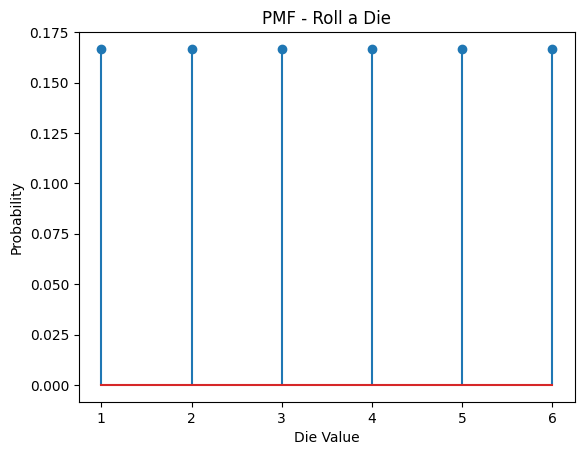

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Discrete values (1 to 6 for a die)
values = np.arange(1, 7)

# All outcomes have an equal probability (1/6 for a fair die)
pmf = [1/6] * 6

# Plotting the PMF
plt.stem(values, pmf)
plt.title("PMF - Roll a Die")
plt.xlabel("Die Value")
plt.ylabel("Probability")
plt.show()

- **Explanation**: In this case, the PMF is uniform, meaning each outcome (1 to 6) has the same probability, $\frac{1}{6} \approx 0.1667 \approx16.67\%$.

## Probability Density Function (PDF) (for Continuous Random Variables)
- **Definition**: The PDF provides the density of a continuous random variable over a range of values. The probability that the variable falls within a specific interval is the area under the curve of the PDF in that interval.

- **Formula**:

$$f(x) = \text{Probability density at } x$$

The total area under the PDF curve is always 1.

### Example: Finding the Probability of a Person’s Height Falling Between an Interval
Let’s assume that heights in a population are normally distributed with:

- Mean height $\mu = 170 \text{ cm}$

- Standard deviation $\sigma = 20 \text{ cm}$

We can use the normal distribution to model the height of individuals. The PDF of a normal distribution is:

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

More on this later...

We want to calculate the probability that a randomly selected person's height falls between an interval (e.g. between 150cm and 200cm).

- This is equivalent to finding the area under the normal distribution curve between these two points.

FloatText(value=150.0, description='Lower:')

FloatText(value=200.0, description='Upper:')

Button(description='Show Interval', style=ButtonStyle())

Button(description='Clear', style=ButtonStyle())

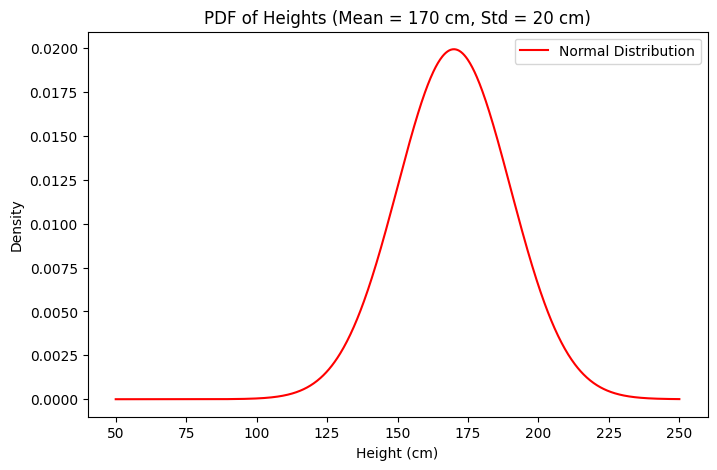

In [49]:
from scipy.stats import norm
import ipywidgets as widgets
from IPython.display import display, clear_output

# Parameters for normal distribution
mu = 170  # Mean height in cm
sigma = 20  # Standard deviation in cm

# Generate data points for heights from 50cm to 250cm
data = np.linspace(50, 250, 1000)

# Calculate the PDF for these heights
pdf = norm.pdf(data, mu, sigma)

# Create input widgets for lower and upper bounds
lower_bound = widgets.FloatText(
    value=150,
    description='Lower:',
    disabled=False
)

upper_bound = widgets.FloatText(
    value=200,
    description='Upper:',
    disabled=False
)

# Create buttons for "Show Interval" and "Clear"
show_button = widgets.Button(description="Show Interval")
clear_button = widgets.Button(description="Clear")

def plot_pdf(show_interval=False):
    # Clear previous output (including plots)
    clear_output(wait=True)
    
    # Display widgets and buttons
    display(lower_bound, upper_bound, show_button, clear_button)
    
    # Create a new plot
    plt.figure(figsize=(8, 5))
    plt.plot(data, pdf, 'r-', label='Normal Distribution')
    
    if show_interval:
        # Get values from the input widgets
        lb = lower_bound.value
        ub = upper_bound.value
        
        # Fill the area between the specified lower and upper bounds
        plt.fill_between(data, pdf, where=(data >= lb) & (data <= ub), color='blue', alpha=0.2, label=f"Area between {lb}cm and {ub}cm")
    
    plt.title('PDF of Heights (Mean = 170 cm, Std = 20 cm)')
    plt.xlabel('Height (cm)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # If showing the interval, calculate and display the probability
    if show_interval:
        prob = norm.cdf(ub, mu, sigma) - norm.cdf(lb, mu, sigma)
        print(f"The probability that someone's height falls between {lb} cm and {ub} cm is approximately {prob:.4f} or {prob * 100:.2f}%.")

# Define button actions
def on_show_clicked(b):
    plot_pdf(show_interval=True)

def on_clear_clicked(b):
    plot_pdf(show_interval=False)

# Link buttons to actions
show_button.on_click(on_show_clicked)
clear_button.on_click(on_clear_clicked)

# Initial plot (without interval filled)
plot_pdf()

- **Explanation**: The plot shows the bell-shaped curve of a normal distribution. The area under the curve represents the probability of the variable falling within a specific range.

    - The probability is calculated using the cumulative distribution function (CDF) of the normal distribution, which tells us the area under the curve between these two values.

## Cumulative Distribution Function (CDF)
- **Definition**: The CDF represents the probability that a random variable will take a value less than or equal to a given value.

- **Formula**:

$$F(x) = P(X \leq x)$$

### Example: CDF of a Normal Distribution

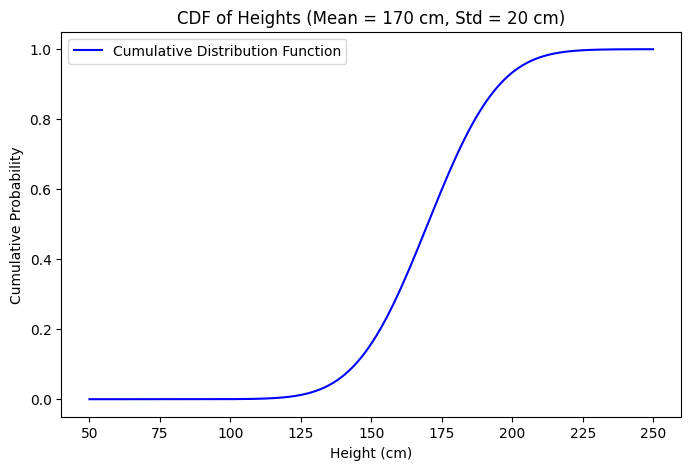

In [50]:
# Calculate the CDF for these heights
cdf = norm.cdf(data, mu, sigma)

# Plotting the CDF
plt.figure(figsize=(8, 5))
plt.plot(data, cdf, 'b-', label='Cumulative Distribution Function')
plt.title('CDF of Heights (Mean = 170 cm, Std = 20 cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

- **Explanation**: The CDF represents the cumulative probability up to a given value. It increases monotonically from 0 to 1 as the value increases.

    - **Example**: At $170\text{cm}$ (the mean), the CDF value will be around $0.5$, meaning there’s a $50\%$ chance that a randomly selected individual’s height will be less than or equal to $170\text{cm}$.

## Common Probability Distributions

### Binomial Distribution (Discrete)
- **Definition**: The binomial distribution represents the number of successes in $n$ independent trials (e.g., flipping a coin). Each trial results in a success or failure.

- **Parameters**:

    - $n$: Number of trials

    - $p$: Probability of success

- **Formula**:

$$P(X = k) = \begin{pmatrix}
n \\
k
\end{pmatrix} p^k (1-p)^{n-k}$$

Where $\begin{pmatrix}
n \\
k
\end{pmatrix}$ is the binomial coefficient.

#### Example: Flipping a Coin 10 times

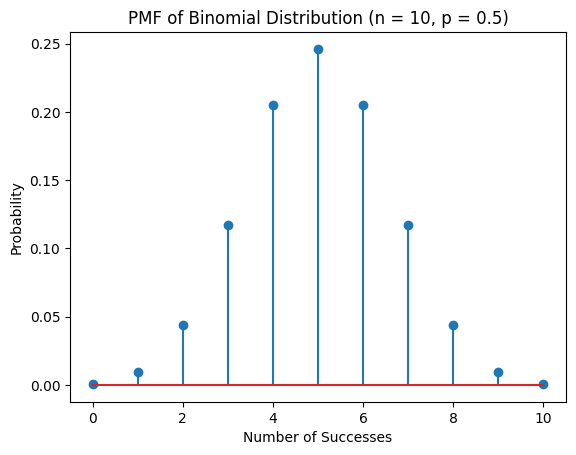

In [64]:
from scipy.stats import binom

# Parameters
n = 10  # Number of trials
p = 0.5  # Probability of success

# Generate binomial distribution
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

# Plotting
plt.stem(x, pmf)
plt.title(f"PMF of Binomial Distribution (n = {n}, p = {p})")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.show()

- **Explanation**: The plot shows the probability of getting different numbers of successes when flipping a coin 10 times.

### Poisson Distribution (Discrete)
- **Definition**: The Poisson distribution describes the probability of a given number of events occurring in a fixed interval of time or space.

- **Parameters**:

    - $\lambda$: Average number of events per interval

- **Formula**:

$$P(X = k) = \frac{\lambda^ke^{-\lambda}}{k!}$$

#### Example

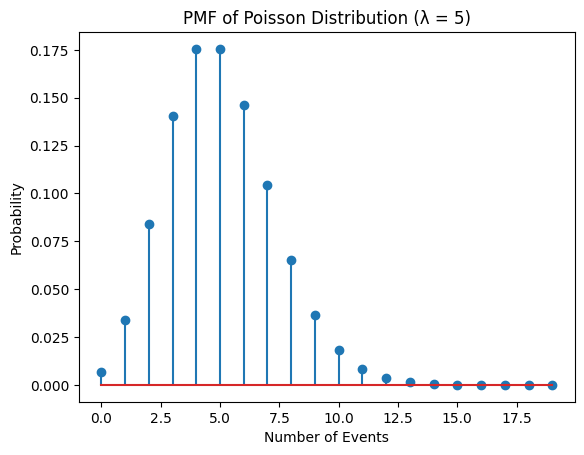

In [67]:
from scipy.stats import poisson

# Parameters
lambda_ = 5  # Average number of events
x = np.arange(0, 20)
pmf = poisson.pmf(x, lambda_)

# Plotting
plt.stem(x, pmf)
plt.title(f"PMF of Poisson Distribution (λ = {lambda_})")
plt.xlabel("Number of Events")
plt.ylabel("Probability")
plt.show()

- **Explanation**: The Poisson distribution models the probability of a number of events happening in a fixed time period when the event rate is constant.

### Geometric Distribution (Discrete)
- **Definition**: The geometric distribution gives the probability that the first success will occur on the $k$-th trial in a sequence of independent trials.

- **Parameters**:

    - $p$: Probability of success

- **Formula**:

$$P(X = k) = (1 - p)^{k - 1}p$$

#### Example

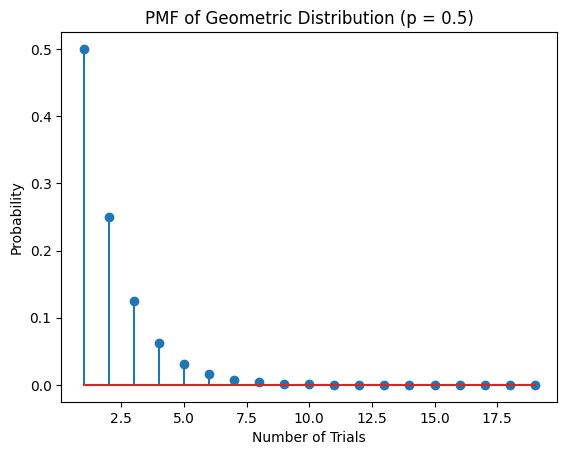

In [72]:
from scipy.stats import geom

# Parameters
p = 0.5  # Probability of success
x = np.arange(1, 20)
pmf = geom.pmf(x, p)

# Plotting
plt.stem(x, pmf)
plt.title(f"PMF of Geometric Distribution (p = {p})")
plt.xlabel("Number of Trials")
plt.ylabel("Probability")
plt.show()

- **Explanation**: The plot shows the probability of needing a certain number of trials to get the first success.

### Normal Distribution (Continuous)
- **Definition**: The normal distribution is a bell-shaped curve, where most values cluster around the mean.

- **Parameters**:

    - $\mu$: Mean

    - $\sigma$: Standard deviation

- **Formula**:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

#### Example

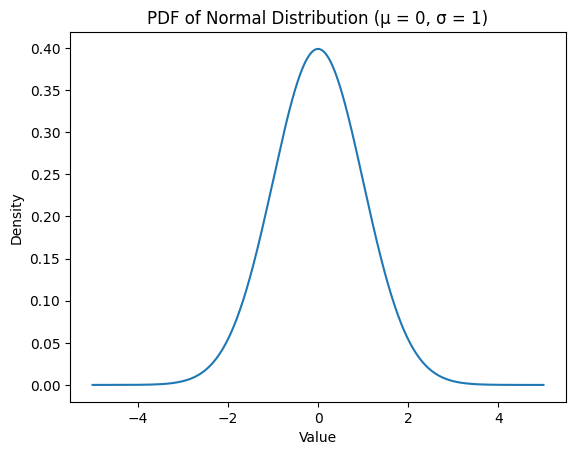

In [59]:
mu = 0 # Mean 
sigma = 1 # Standard deviation

x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x, mu, sigma)

# Plotting
plt.plot(x, pdf)
plt.title("PDF of Normal Distribution (μ = 0, σ = 1)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

- **Explanation**: The plot shows the PDF of a normal distribution with mean 0 and standard deviation 1.